<font color="#CC3D3D"><p>
# 02. 문서 단어 행렬

### 문서 단어 행렬(Document Term Matrix)
- 문서별로 단어의 빈도를 정리한 표
- 문서 1: 오늘은 밥을 먹었ㅉ다
- 문서 2: 어제도 밥, 오늘도 밥

||오늘|어제|밥|먹다|
|----|----|----|----|----|
|문서1     |1     |0     |1     |1 |
|문서2     |1     |1     |2     |0 |

### DTM의 장단점
- 비정형 데이터인 텍스트를 표 형태로 정형화
- 정형 데이터의 다양한 통게 기법을 적용가능
- 처리가 단순 <-> 어순과 맥락을 무시하는 것이 단점

<font color="#green"><p>
## CountVectorizer 실습

In [62]:
import pandas as pd
df = pd.read_excel('data/yelp.xlsx')

In [63]:
df.head(5)

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [64]:
df.shape

(1000, 2)

### 문서 단어 행렬 설정


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 500, stop_words = 'english') 

max_features : 문서단어행렬에 포함시킬 최대 단어의 수\
stop_words: 분석에서 제외할 불용어를 설정
>- english로 설정하면 영어의 경우 관사, 전치사 등을 제외


>- 다른 언어는 리스트 등의 형태로 불용어 목록을 넘겨주어야함

### 영어 불용어 목록보기

In [66]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

- 불용어 추가

In [67]:
stop_words = ENGLISH_STOP_WORDS|{'my_stop_word'}

### 문서 단어 행렬 만들기

- df의 review컬럼을 바탕으로 문서 단어 행렬을 만든다

In [68]:
dtm = cv.fit_transform(df['review'])

- 만들어진 dtm의 형태를 확인해보면 1000행, 500열

In [69]:
dtm.shape

(1000, 500)

- 단어 목록을 환인한다. 단어 목록은 dtm이 아닌 cv에 저장

In [70]:
cv.get_feature_names_out()

array(['10', '100', '12', '20', '30', '35', '40', 'absolutely', 'ago',
       'amazing', 'ambiance', 'ambience', 'anytime', 'area', 'arrived',
       'ask', 'asked', 'ate', 'atmosphere', 'attentive', 'authentic',
       'average', 'avoid', 'away', 'awesome', 'awful', 'bacon', 'bad',
       'bar', 'barely', 'basically', 'bathroom', 'batter', 'bay', 'beans',
       'beat', 'beautiful', 'beef', 'beer', 'believe', 'belly', 'best',
       'better', 'big', 'biscuits', 'bisque', 'bit', 'bite', 'bites',
       'black', 'bland', 'boyfriend', 'bread', 'breakfast', 'bring',
       'brought', 'brunch', 'buffet', 'burger', 'burgers', 'business',
       'busy', 'butter', 'cafe', 'came', 'care', 'check', 'checked',
       'cheese', 'chef', 'chewy', 'chicken', 'chips', 'clean', 'close',
       'cold', 'come', 'coming', 'considering', 'cooked', 'cool',
       'couldn', 'couple', 'course', 'cream', 'customer', 'damn', 'day',
       'deal', 'decor', 'definitely', 'delicious', 'delish', 'deserves',
      

### 희소행렬(sparse matrix)

- 문서 단어 행렬에서 대부분의 값은 0

- 이러한 행렬을 희소(sparse)행렬이라 함 <->조밀(dense)

- 용량을 아끼기 위해 0을 빼고 저장하는 압축 방법을 사용

### 희소 행렬 압축 방식

- 희소행렬: 대부분의 원소가 0인 행렬

- 행렬 형식으로 저장하면 용량을 많이 차지하므로 압축하여 저장한다

- 압축방식:
    - Coordinate list
    - Compressed Sparse Row


### COOrdinate list

- 0이 아닌 값을 (행,열,값)형식으로 저장
\begin{bmatrix}
10 & 20 & 0 & 0 \\
0 & 30& 40& 0 \\
0& 0 & 0 & 50\\
\end{bmatrix}

- 예: [(0,0,10),(0,1,20),(1,1,30),(1,2,40),(2,3,50)]

### Compressed Sparse Row

- 값과 열번호를 별도로 저장

- 행번호 대신, 값에서 각 행의 시작과 끝 인덳스를 저장하여 행번호를 압축

- 예: 값 = [10,20,30,40,50] 열 = [0,1,1,2,3], 행 = [0,2,4,5]

- 빈행이 없고, 한 행에 여러 개의 값이 둘어갈 경우 압축효율이 높음

- 행렬의 한 행의 값을 빠르게 뽑을 수 있음

- 사이킷런에서 문서 단어 행렬을 만들 떄 사용하는 방법

- CSC: 행 대신 열번호를 압축한 형식

### 합계

- 단어별 총 빈도(axis = 1: 행별 합계)

In [71]:
dtm.sum(axis = 1)

matrix([[ 3],
        [ 1],
        [ 4],
        [ 2],
        [ 4],
        [ 4],
        [ 3],
        [ 5],
        [ 2],
        [ 1],
        [ 1],
        [ 0],
        [ 3],
        [ 2],
        [ 2],
        [ 0],
        [ 2],
        [ 4],
        [ 5],
        [ 2],
        [ 0],
        [ 2],
        [ 1],
        [ 3],
        [ 0],
        [ 2],
        [ 3],
        [ 5],
        [11],
        [ 3],
        [ 5],
        [ 1],
        [ 1],
        [ 7],
        [ 4],
        [ 2],
        [ 3],
        [ 8],
        [ 1],
        [ 2],
        [ 3],
        [ 3],
        [ 9],
        [ 5],
        [ 3],
        [ 4],
        [ 3],
        [ 6],
        [ 3],
        [ 7],
        [ 7],
        [ 5],
        [ 1],
        [ 5],
        [ 1],
        [ 7],
        [ 6],
        [ 3],
        [ 7],
        [ 1],
        [ 4],
        [ 2],
        [ 1],
        [ 1],
        [ 2],
        [ 5],
        [ 2],
        [ 5],
        [ 6],
        [ 4],
        [ 4],
      

- 문서별 총 단어 수(axis = 0:열별 합계)

In [72]:
dtm.sum(axis = 0)

matrix([[  5,   2,   2,   4,   5,   3,   4,   8,   3,  24,   7,   3,   5,
           7,   3,   4,   5,   3,  11,   7,   6,   4,   5,   5,  12,   3,
           5,  18,   7,   5,   2,   3,   2,   4,   3,   4,   3,   5,   8,
           3,   2,  30,  16,   3,   2,   2,   8,   2,   2,   2,  11,   3,
           5,  10,   5,   3,   3,  11,  12,   4,   4,   3,   3,   3,  20,
           3,   7,   3,   3,   4,   3,  17,   7,   9,   4,   9,  11,  10,
           4,   7,   3,   3,   3,   3,   4,   6,   4,   9,   7,   3,  19,
          23,   3,   3,   5,   3,  22,  13,   3,   8,   6,   4,  19,   5,
           4,   8,   9,   3,  26,   3,   3,   4,   4,   4,   4,   3,  19,
           5,   8,   3,   3,   6,   5,   3,   3,   4,  10,   5,   3,  20,
           5,   4,   7,  12,   7,   5,   3,  11,   2,   2,   2,   8,   2,
           2,   2,   3,   2,   5,   3,  13,   3,   2,   2,   2,   2,   4,
         126,  14,   5,   5,  27,   4,   9,   3,   2,   4,   2,   4,   3,
           8,   2,   2,  18,   2,   3,

### 단어 빈도 데이터 프레임

In [73]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    '빈도': dtm.sum(axis = 0).flat
    })

- 각 단어의 총 빈도를 데이터 프레임으로 만들어 word_count라고 한다

- .sum의 결과가 횅렬 형태이므로 .flat을 사용하여 컬럼에 들어갈 수 있는 형태로 변환한다

### 빈도수 정렬

In [74]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
156,food,126
316,place,106
175,good,95
389,service,85
178,great,70


- .sort_values()를 이용해 빈도 순으로 정렬을 한다.

- ascending = True를 하면 오름차순 정렬

- 생략하거나 False로 하면 내림차순 정렬


-엑셀 파일로 저장:

In [75]:
word_count.to_excel('word_count.xlsx')

<font color="#green"><p>
## 단어구름

- 단어 빈도를 시각화하는 방법

- 자주 나오는 단어는 크게, 드물게 나오는 단어는 작게 시각화

- 단어의 배치를 통해 특정한 이미지 형태가 되도록 하게도 함

### 설치와 임포트

- pip명령어로 설치

In [76]:
# pip install wordcloud

- wordcloud 모듈 임포트

In [77]:
from wordcloud import WordCloud

### 설정

In [78]:

wc = WordCloud(
    font_path = 'NanumGothic.ttf',#글꼴 파일이 있을경우 , '눈누' -> 폰트 사이트
    background_color = 'white',# 배경색
    max_words = 100,# 시각화할 단어 개수
    width = 400,# 가로크기
    height= 300)# 세로크기

### 그리기

- word_count를 사전(dict) 형태로 변환

In [79]:
count_dic = dict(zip(word_count.단어, word_count.빈도))

- 단어구름

In [80]:
cloud = wc.fit_words(count_dic)

### 보기 및 저장

- 보기

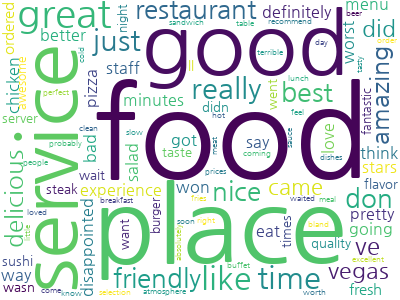

In [81]:
cloud.to_image()

### 파일로 저장

In [82]:
cloud.to_file('cloud.png')

<font color="#green"><p>
## 공기어 네트워크

### 공기어 네트워크 분석

- 공기어(cooccurence): 한 맥락에 함꼐 나타나는 단어

- 네트워크 분석(network analysis): 점과 선으로 이루어진 구조를 분석하는 것

### 실습준비

- 임포트

In [83]:
import numpy as np
import pandas as pd

- 데이터 열기

In [84]:
df = pd.read_excel('data/yelp.xlsx')

### 문서 단어 행렬 만들기

- 문서 단어 행렬 만들기

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', min_df = 0.01, binary = True)

- min_df = 0.01: 최소 1%이상의 문서에서 출현한 단어만 포함

- binary = True: 문서에 나타난 단어는 빈도 무관하게 1이 됌

In [86]:
dtm = cv.fit_transform(df.review)

### 인접 행렬 만들기

- 인접행렬(adjacency matrix): 네트워크에서 인접한 점(단어)들의 관계를 행렬로 나타낸것

- 문서 단어 행렬을 곱하면 함꼐 나타난 단어는 1이 되고, 그렇지 않은 단어는 0이 됌

In [87]:
cooccur = dtm.T @ dtm
adj = cooccur.A

- .T: 전치행렬(행과 열을 바꿈)
- @: 행렬곱

### 점 상호 정보/ 향상도

- 빈도가 높은 단어는 다른 단어와 함께 나올 확률도 높음
- 두 단어가 함꼐 나올 확률을 각 단어가 나올 확률과 비교할 필요


$$\frac{P(A\cap B)}{P(A)P(B)}$$


- A와B가 독립이면, 위의 비율은 1

- 분야에 따라 향상도(lift), 점 상호 정보(위의 값에 log를 적용한 경우)라 부름

### 향상도로 변환

- 각 단어별 문서빈도

In [88]:
n = np.diag(adj)

- 전체문서

In [89]:
total, _ = dtm.shape

- 향상도 

In [90]:
lift = total * adj / np.outer(n,n)

### 시각화를 위한 편집

- 향상도가 2 이상인 경우는 1, 아니면 0으로 바꿈

In [91]:
m = np.where(lift >= 2,1,0)

- 대각원소(=행렬에서 대각선 방향의 원소)는 단어의 문서 빈도를 나타내므로 0으로 설정

In [92]:
np.fill_diagonal(m,0)

### Networkx

- python에서 네트워크 분석을 위한 라이브러리

In [93]:
import networkx as nx

- 인접행렬을 네트워크로 바꾸기

In [94]:
net = nx.from_numpy_array(m)

### 공기어 보기

- 노드 이름을 단어로 바꾸기

In [95]:
words = cv.get_feature_names_out()
net = nx.relabel_nodes(net, dict(enumerate(words)))

- steak와 연결된 단어 보기

In [96]:
list(nx.neighbors(net, 'steak'))

['amazing',
 'atmosphere',
 'best',
 'chicken',
 'did',
 'don',
 'flavor',
 'fresh',
 'great',
 'really',
 'vegas',
 'wasn',
 'worst']

### 중심성

- 네트워크에서 노드의 중요도를 나타내는 지표

- 연결 중심성(degree centrality): 연결된 단어 수/(전체 단어 수 -1) -> 친구가 많은것

In [97]:
dc = nx.degree_centrality(net)

- 메개 중심성(between centrality): 단어-단어 간의 최단 경로에 포함된 비율

In [98]:
bc = nx.betweenness_centrality(net)


- 근접 중심성(closeness centrality): 다른 단어와 거리가 평균적으로 짧은 단어

In [99]:
cc = nx.closeness_centrality(net)

>- 고유벡터 중심성(eigenvector centrality): 중요한 단어와 연결된 단어가 중요한 단어  -> 중요한 친구

In [100]:
ec = nx.eigenvector_centrality(net)

### 중심성 순으로 정렬

- 중심성을 데이터 프레임으로 변환

In [101]:
ecf = pd.DataFrame(ec.items(), columns=['word', 'centrality'])

- 중심성 순으로 정렬

In [102]:
ecf.sort_values('centrality')

,word,centrality
39,loved,0.026497
63,stars,0.041249
77,way,0.051813
62,staff,0.056761
68,terrible,0.057225
...,...,...
75,want,0.164544
29,going,0.170552
22,experience,0.174456
70,time,0.191572


### pyvis 

- Python 네트워크 시각화를 위한 라이브러리

- 설치

In [103]:
# pip install pyvis


- 임포트

In [120]:
from pyvis.network import Network

### pyvis 시각화

- networkx 네트워크를 pyvis 네트워크로 변환

In [121]:
vis = Network(height='800px', width= '1000px')
vis.from_nx(net)

- 설정 버튼 추가

In [122]:
vis.show_buttons(filter_= True)

- 보이기

In [125]:
vis.save_graph('nx.html')